<a href="https://colab.research.google.com/github/muzaffarizamuddin/Data-Science-Project/blob/main/P166246_STQD6014_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STQD6014 Data Analysis on Airline Delays**


#1.0 Introduction

This is a google colab notebook for STQD6014 Project 2 Assignment for student P166246 Muzaffar Izamuddin bin Daud from Weekend Class.

As I have an ambition to work for leading airline looking particularly on the area of big data I have chosen a dataset closely related to this realm. Although my likely goal is malaysian companies such as AirAsia and Malaysia Airlines, there isnt a open source dataset for malaysian airline available. Instead I have chosen to analyze the dataset from kaggle.com named Airline Delay Cause. The data was downloaded in csv form and loaded into this google colab notebook in its entirety. The dataset have key info that could help us understand the causes of airline delay. Even though the dataset is for american airline industry, similar steps and approaches could be applied to Malaysian airlines to study the causes of delay from data standpoint of view

#2.0 Problem Statement
As we malaysians know, delays in airports in malaysia are very common especially in Airasia domestic flights, the root cause of delays are not usually communicated in malaysia and delays are also not properly penalized like in western countries. This stands in contrast to international standards where authorities often impose mandatory financial penalties for domestic flights that are delayed beyond three hours. This lack of punctuality is a critical concern because research indicates that extended waiting periods at the airport cause passengers to experience significant mental stress and anxiety.(Faiza & Khalil, 2024). Furthermore, flight schedule disruption can cost airlines up to $22 billion per year in the USA (Rapajic, 2009), which means the cost in Malaysia would easily reach the same level as regional travel continues to grow.

The objective of this anaysis is to understand what could be the root causes of the delay and see if the data can shed light into why airlines might experience delays. The study also aims to recommend some improvement steps airline could take in order to avoid further delays based on the analysis of an open source data on aircraft delay causes.

#3.0 Dataset
The dataset is taken from https://www.kaggle.com/datasets/abdelazizel7or/airline-delay-cause

The dataset has 21 columns in total. The first 2 column represent the year and month of the data - both this column would have to be cleaned into a datetime format to enable time series plots in the data cleaning section

Then column 3 and 4 refers to the carrier and carrier_name which represents the airline letter assignment as well as the airline name. The dataset also gives information about airport and airport_name which gives us an idea about where an airplane has departed from. this piece of information will be useful for us to find if airport management has to do with delays.

arr_flights is the number of flights operatied in the given month for the given airline-airport pair. Next there are 2 groups of data:

  1. The first group is count data
    arr_del15 - count of flights delayed above 15min
    carrier_ct - count of flights delayed due to the carrier
    weather_ct - count of flights delayed due to the weather
    nas_ct - count of flights delayed due to air traffic control
    security_ct - count of flights delayed due to airport security
    late_aircraft_ct - count of flights delayed due to late aircraft arrival
  2. The second group refers to the length of delay
    arr_delay - length of delay
    carrier_delay - length of delay  due to the carrier
    weather_delay - length of delay  due to the weather
    nas_delay - length of delay  due to air traffic control
    security_delay - length of delay  due to airport security
    late_aircraft_delay - length of delay  due to late aircraft arrival

These data shed light on what could be the root causes of airline delays. We should note that from previous research, major causes of flight cancellations are more numerous that those listed in this open source data. The reasons range from security problems, technical faults, air traffic, availability of planes and aircrew, restrictions because of infectious diseases, political to economic and religious unrest in the country. (Faiza & Khalil, 2024)

In [35]:
# Mount to the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import Pandas and NumPy library

In [36]:
# Import necessary library
import numpy as np
import pandas as pd


## Load Data
 load the specified CSV file Airline_Delay_Cause into Colab



In [37]:
df_delay_cause = pd.read_csv('/content/drive/MyDrive/Data/Airline_Delay_Cause.csv')
df_delay_cause.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


## 4.0 Data Cleaning and Inspection

### Check for Missing Values and Data Types

First, let's check for any missing values in the dataset and inspect the data types of each column to ensure data quality and prepare for further analysis.

In [38]:
# Check for missing values
print("Missing values per column:")
display(df_delay_cause.isnull().sum())

# Display data types and non-null counts
print("\nDataFrame Information (Data Types and Non-Null Counts):")
df_delay_cause.info()

Missing values per column:


,0
year,0
month,0
carrier,4
carrier_name,4
airport,3
airport_name,0
arr_flights,493
arr_del15,732
carrier_ct,492
weather_ct,494



DataFrame Information (Data Types and Non-Null Counts):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverte

## 5.0 Handling Missing Values

Based on the previous inspection, we have identified missing values in several columns. We will proceed with a two-step approach to handle them:
1.  **Remove rows with missing categorical data**: Drop rows where carrier, carrier_name, or airport values are missing, as these are critical identifiers and have very few missing entries.
2.  **Remove remaining rows with any missing data**: For the rest of the columns, which are mostly numerical and also contain a small proportion of missing values, we will drop any remaining rows with NaN values to ensure a complete dataset for analysis.

In [39]:
# Step 1: Drop rows where 'carrier', 'carrier_name', or 'airport' are missing
initial_rows = df_delay_cause.shape[0]
df_delay_cause.dropna(subset=['carrier', 'carrier_name', 'airport'], inplace=True)
rows_after_categorical_drop = df_delay_cause.shape[0]
print(f"Rows removed after dropping missing categorical values: {initial_rows - rows_after_categorical_drop}")

# Step 2: Drop any remaining rows with missing values across all other columns
df_delay_cause.dropna(inplace=True)
rows_after_all_drop = df_delay_cause.shape[0]
print(f"Rows removed after dropping any remaining missing values: {rows_after_categorical_drop - rows_after_all_drop}")

print(f"\nFinal DataFrame shape after handling all missing values: {df_delay_cause.shape}")

# Verify that there are no more missing values
print("\nMissing values after cleaning:")
display(df_delay_cause.isnull().sum())

Rows removed after dropping missing categorical values: 7
Rows removed after dropping any remaining missing values: 749

Final DataFrame shape after handling all missing values: (317261, 21)

Missing values after cleaning:


,0
year,0
month,0
carrier,0
carrier_name,0
airport,0
airport_name,0
arr_flights,0
arr_del15,0
carrier_ct,0
weather_ct,0


## Create Date Column

To facilitate time-series analysis, we will create a date column by combining the existing year and month columns. Since day information is not available, we will assume the 1st day of each month for all entries.

In [40]:
# Create a new 'date' column by combining 'year' and 'month', assuming the 1st day of the month
df_delay_cause['date'] = pd.to_datetime(df_delay_cause['year'].astype(str) + '-' + df_delay_cause['month'].astype(str) + '-01')

# Display the first few rows with the new 'date' column
print("DataFrame head with new 'date' column:")
display(df_delay_cause[['year', 'month', 'date']].head())

# Verify the data type of the new 'date' column
print("\nData type of the 'date' column:")
display(df_delay_cause['date'].dtype)

DataFrame head with new 'date' column:


,year,month,date
0,2022,5,2022-05-01
1,2022,5,2022-05-01
2,2022,5,2022-05-01
3,2022,5,2022-05-01
4,2022,5,2022-05-01



Data type of the 'date' column:


dtype('<M8[ns]')

## 6.0 Plots
### 6.1 Total Delays by Carrier

To understand which carriers experience the most delays, we will aggregate the arr_del15 (arrival flights delayed by 15 minutes or more) for each carrier_name and visualize the results using a bar plot.

Top 10 Carriers by Total Delays:


,carrier_name,arr_del15
28,Southwest Airlines Co.,4053401.0
6,American Airlines Inc.,2609248.0
12,Delta Air Lines Inc.,2179117.0
27,SkyWest Airlines Inc.,1984694.0
31,United Air Lines Inc.,1814691.0
15,ExpressJet Airlines Inc.,1529090.0
7,American Eagle Airlines Inc.,1129056.0
30,US Airways Inc.,997160.0
21,JetBlue Airways,953367.0
9,Atlantic Southeast Airlines,618201.0


/tmp/ipython-input-3268941651.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='arr_del15', y='carrier_name', data=total_delays_by_carrier, palette='viridis')


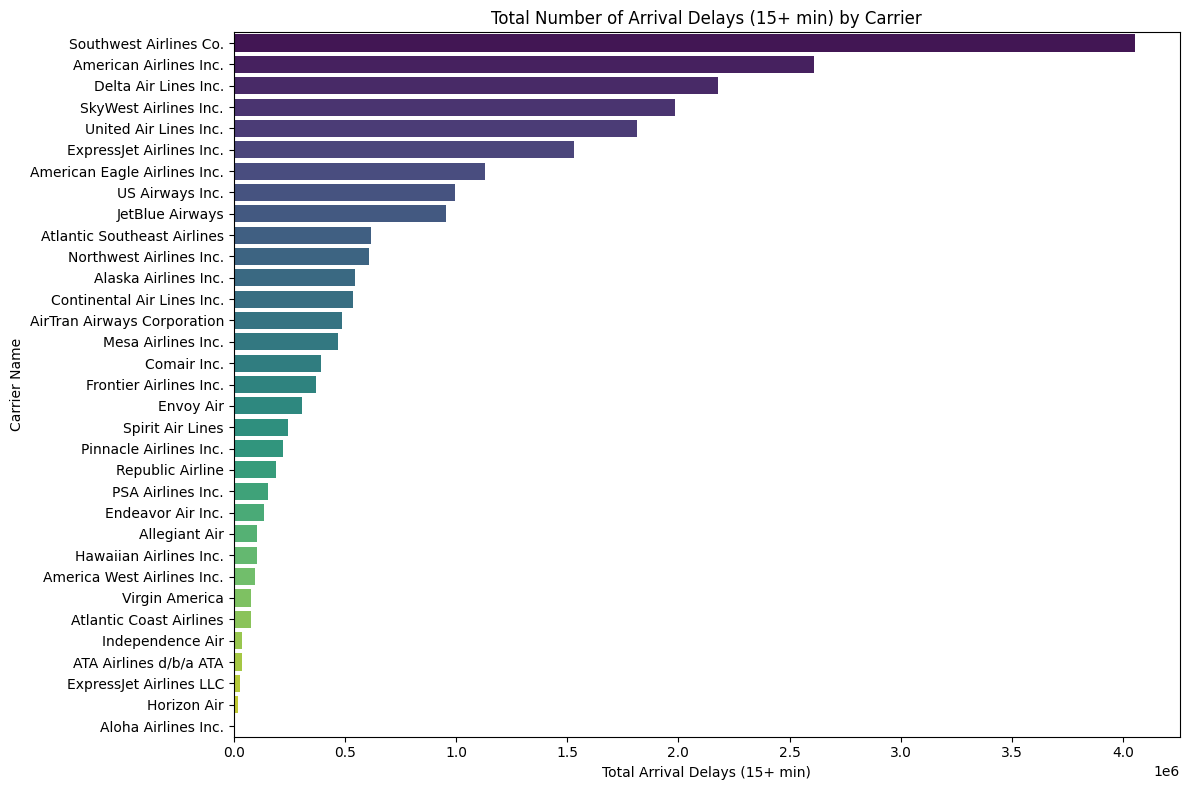

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by carrier_name and sum the 'arr_del15' (total delays)
total_delays_by_carrier = df_delay_cause.groupby('carrier_name')['arr_del15'].sum().reset_index()

# Sort the results for better visualization
total_delays_by_carrier = total_delays_by_carrier.sort_values(by='arr_del15', ascending=False)

print("Top 10 Carriers by Total Delays:")
display(total_delays_by_carrier.head(10))

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='arr_del15', y='carrier_name', data=total_delays_by_carrier, palette='viridis')
plt.title('Total Number of Arrival Delays (15+ min) by Carrier')
plt.xlabel('Total Arrival Delays (15+ min)')
plt.ylabel('Carrier Name')
plt.tight_layout()
plt.show()

###6.2 Distribution of Delay Length by Carrier

To further analyze delay patterns, we will create a boxplot showing the distribution of arr_delay (total arrival delay minutes) for each carrier_name. This will highlight the median delay, interquartile range, and potential outliers for each airline.

/tmp/ipython-input-683720762.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='arr_delay', y='carrier_name', data=df_delay_cause,


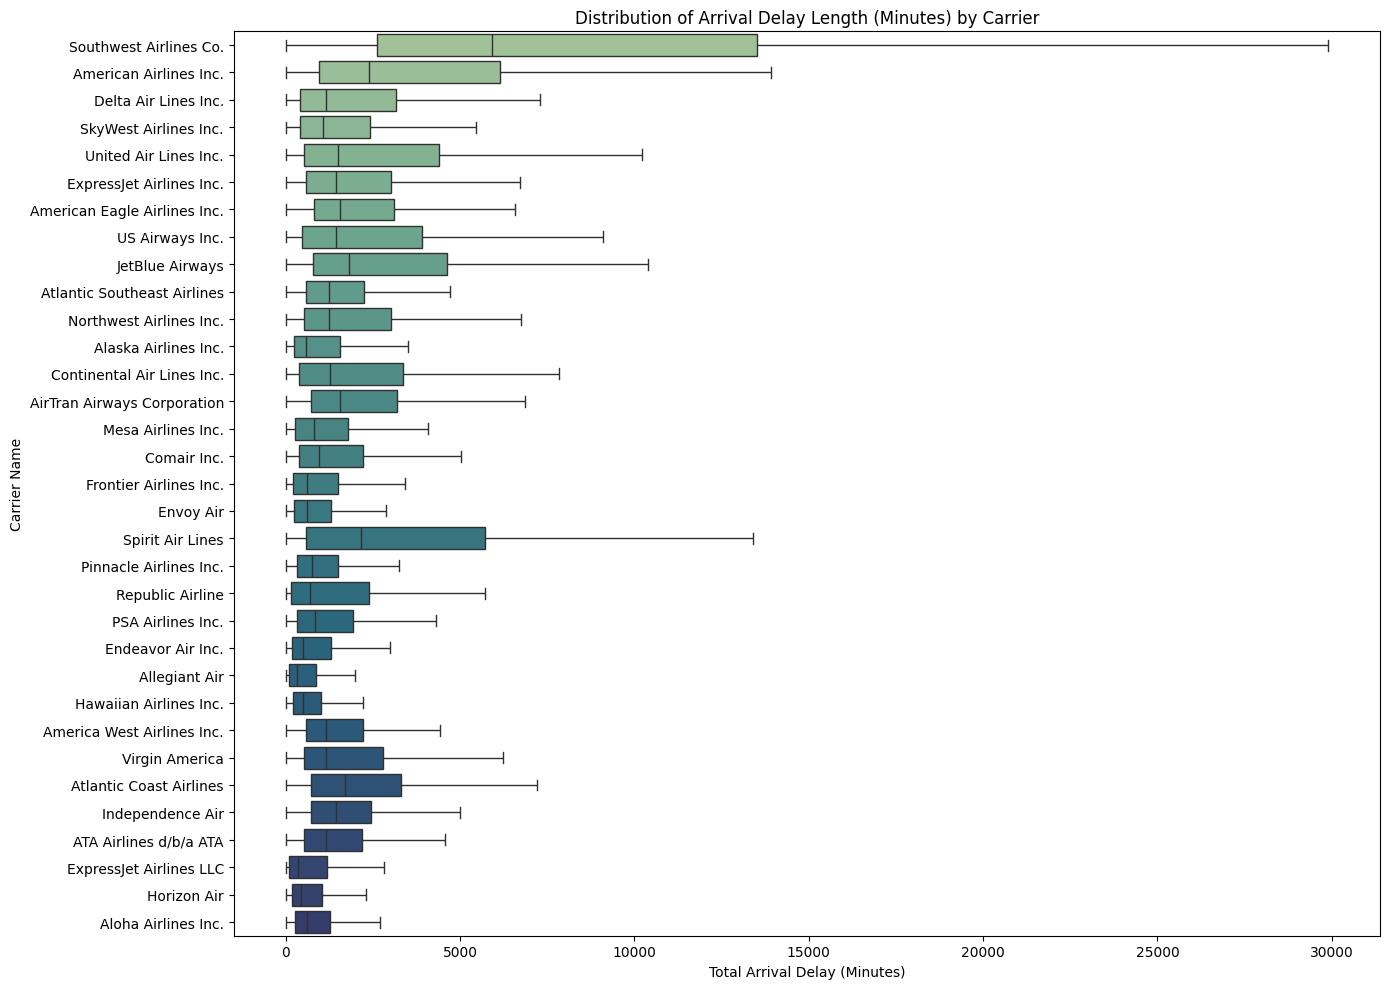

In [42]:
# Get the order of carriers from the previous total delays analysis for consistent ordering
carrier_order = total_delays_by_carrier['carrier_name'].tolist()

plt.figure(figsize=(14, 10)) # Adjust figure size for better readability
sns.boxplot(x='arr_delay', y='carrier_name', data=df_delay_cause,
            order=carrier_order, palette='crest', showfliers=False) # showfliers=False to avoid extreme outliers cluttering the plot

plt.title('Distribution of Arrival Delay Length (Minutes) by Carrier')
plt.xlabel('Total Arrival Delay (Minutes)')
plt.ylabel('Carrier Name')
plt.tight_layout()
plt.show()

What we can see from the plot, there are some airlines with extremely long delays, most notably:
1. Southwest Airlines Co
2. American Airlines
3. Spirit Air Lines.

## 6.3 Delay Reasons for Top 10 Carriers (Pie Charts)

To delve deeper into the causes of delays for the carriers with the highest number of overall delays, we will create individual pie charts for the top 10 carrier_names. Each pie chart will illustrate the proportion of different delay reasons, specifically: carrier_ct, weather_ct, nas_ct, security_ct, and late_aircraft_ct.

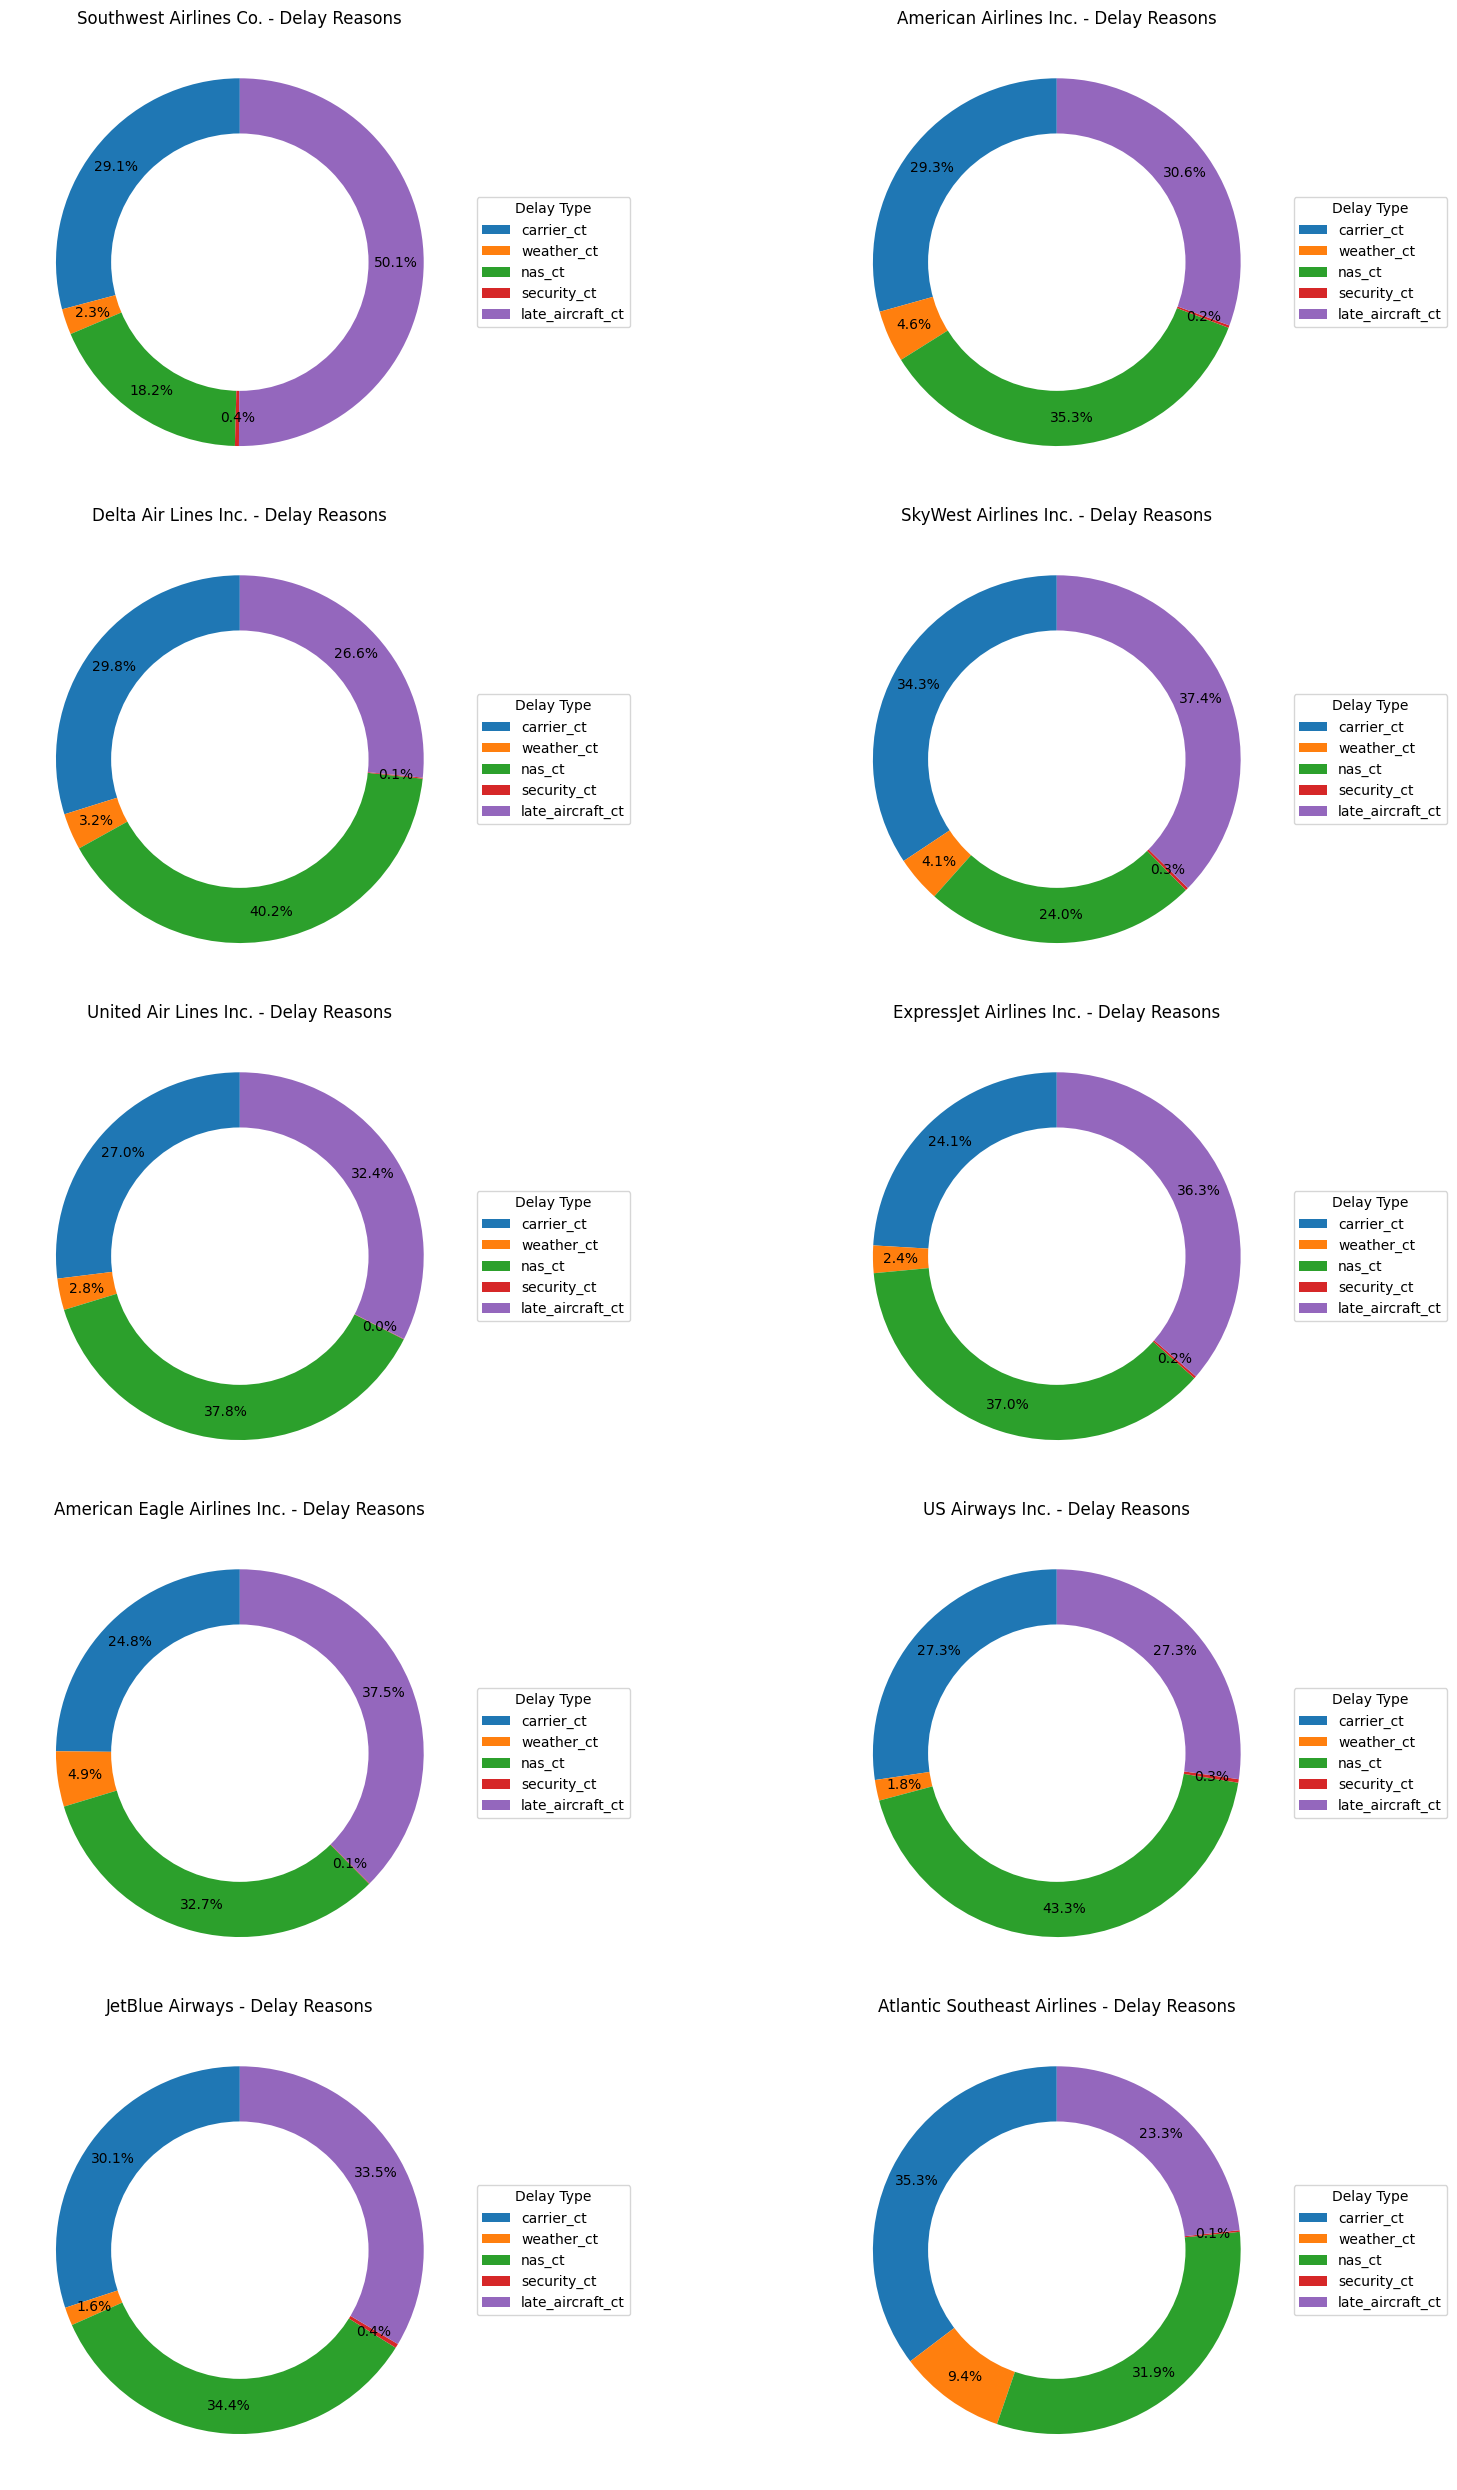

In [44]:
# Get the names of the top 10 carriers from the previous analysis
top_10_carriers = total_delays_by_carrier.head(10)['carrier_name'].tolist()

# Filter the DataFrame to include only the top 10 carriers
df_top_10_carriers = df_delay_cause[df_delay_cause['carrier_name'].isin(top_10_carriers)]

# Define the delay reason columns
delay_reason_cols = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

# Loop through each of the top 10 carriers to create a pie chart
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 25)) # Adjust figsize as needed
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, carrier in enumerate(top_10_carriers):
    # Filter data for the current carrier
    carrier_data = df_top_10_carriers[df_top_10_carriers['carrier_name'] == carrier]

    # Sum the delay counts for each reason
    delay_sums = carrier_data[delay_reason_cols].sum()

    # Check if there are any delays to plot for this carrier
    if delay_sums.sum() == 0:
        axes[i].text(0.5, 0.5, 'No delays recorded', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes, fontsize=12)
        axes[i].set_title(f'{carrier} - Delay Reasons')
        axes[i].set_aspect('equal') # Ensure pie is circular
        continue

    # Create the pie chart
    wedges, texts, autotexts = axes[i].pie(delay_sums, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

    # Add a circle at the center to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axes[i].add_artist(centre_circle)

    axes[i].set_title(f'{carrier} - Delay Reasons')
    axes[i].set_aspect('equal') # Ensure pie is circular

    # Add legend to each pie chart
    axes[i].legend(wedges, delay_sums.index, title="Delay Type", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

####Prevailing reasons for Delay
It was found that the 3 delay reasons that are the most apparent are
1. Late aircraft arrival
2. Air traffic control issues
3. Due to Carrier management itself

Usually and airline could only control issue 3, carrier management strategies itself. Therefore the next step of this analysis will focus on carrier-induced delays.

This study will also try to explore air traffic control issues versus airport name - to see if there is any specific pattern to bad air traffic handling.

There is not much further analysis we can do for late aircraft arrival as the causes for this could be many - redirection due to weather, aircraft speed and load. studying more on this would need external dataset which is not available in this open source data set. therefore we will depp dive into items 3 and 2 only for the purposes of this study.


## 6.4 Carrier-Induced Delays by Airline

To focus on delays directly attributable to airlines, we will plot the total carrier_ct (count of flights delayed due to airline-related issues) for each carrier_name using a bar plot. This will help identify carriers with the highest operational delay counts.

Top 10 Carriers by Carrier-Induced Delays:


,carrier_name,carrier_ct
28,Southwest Airlines Co.,1180656.22
6,American Airlines Inc.,765748.23
27,SkyWest Airlines Inc.,681537.85
12,Delta Air Lines Inc.,650396.20
31,United Air Lines Inc.,489111.98
15,ExpressJet Airlines Inc.,368003.39
21,JetBlue Airways,286696.99
7,American Eagle Airlines Inc.,280380.26
30,US Airways Inc.,272573.01
9,Atlantic Southeast Airlines,218409.85


/tmp/ipython-input-1753180204.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='carrier_ct', y='carrier_name', data=total_carrier_delays, palette='magma')


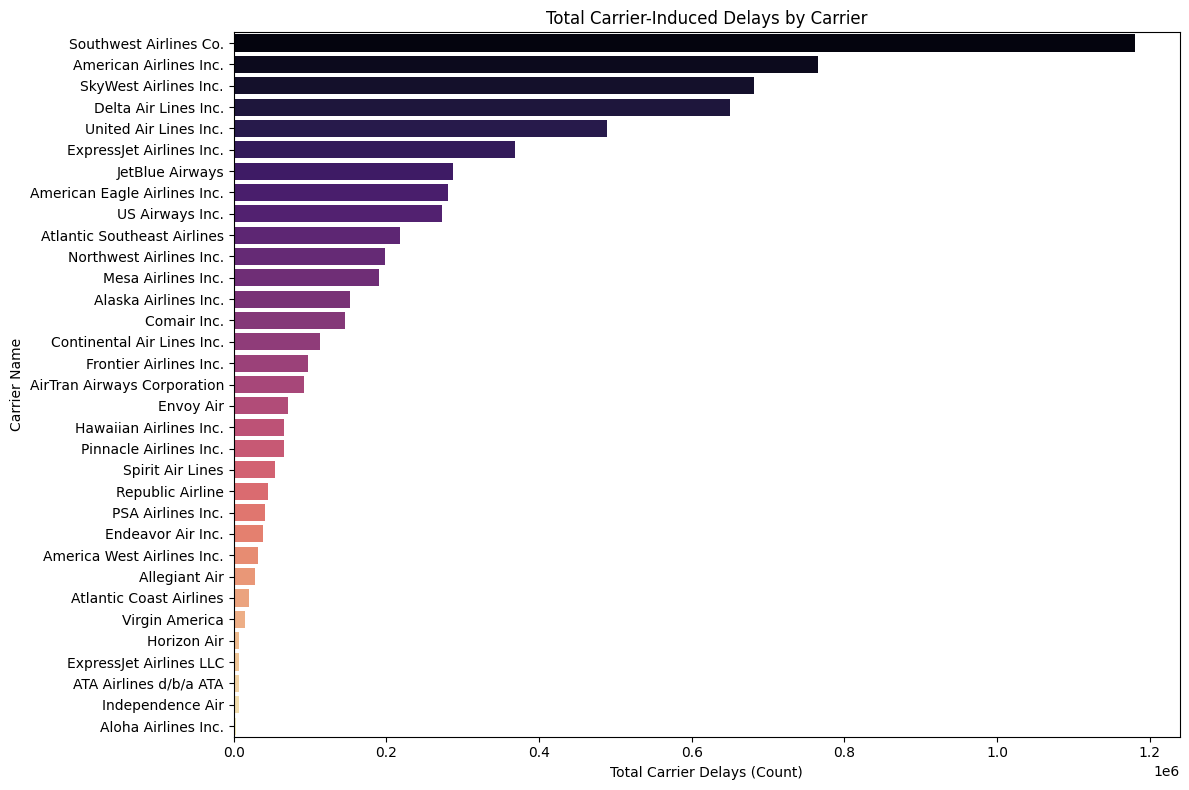

In [45]:
# Group by carrier_name and sum the 'carrier_ct'
total_carrier_delays = df_delay_cause.groupby('carrier_name')['carrier_ct'].sum().reset_index()

# Sort the results for better visualization
total_carrier_delays = total_carrier_delays.sort_values(by='carrier_ct', ascending=False)

print("Top 10 Carriers by Carrier-Induced Delays:")
display(total_carrier_delays.head(10))

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='carrier_ct', y='carrier_name', data=total_carrier_delays, palette='magma')
plt.title('Total Carrier-Induced Delays by Carrier')
plt.xlabel('Total Carrier Delays (Count)')
plt.ylabel('Carrier Name')
plt.tight_layout()
plt.show()

The number of delay barplot tells us more on which airline has the most number of delays. however, the number of delay is a biased parameter as it is dependent on the size and number of aircraft a carrier has. Therefore we are unable to make a fair judgement across the airline carrier.

### 6.5 Distribution of Carrier-Induced Delay Time by Carrier

To examine the duration of delays specifically caused by carriers, we will create a boxplot showing the distribution of carrier_delay (total minutes of delay caused by carrier-related issues) for each carrier_name. we will also sort the boxplot based on mean time of delay per airline.

/tmp/ipython-input-2875614723.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='carrier_delay', y='carrier_name', data=df_delay_cause,


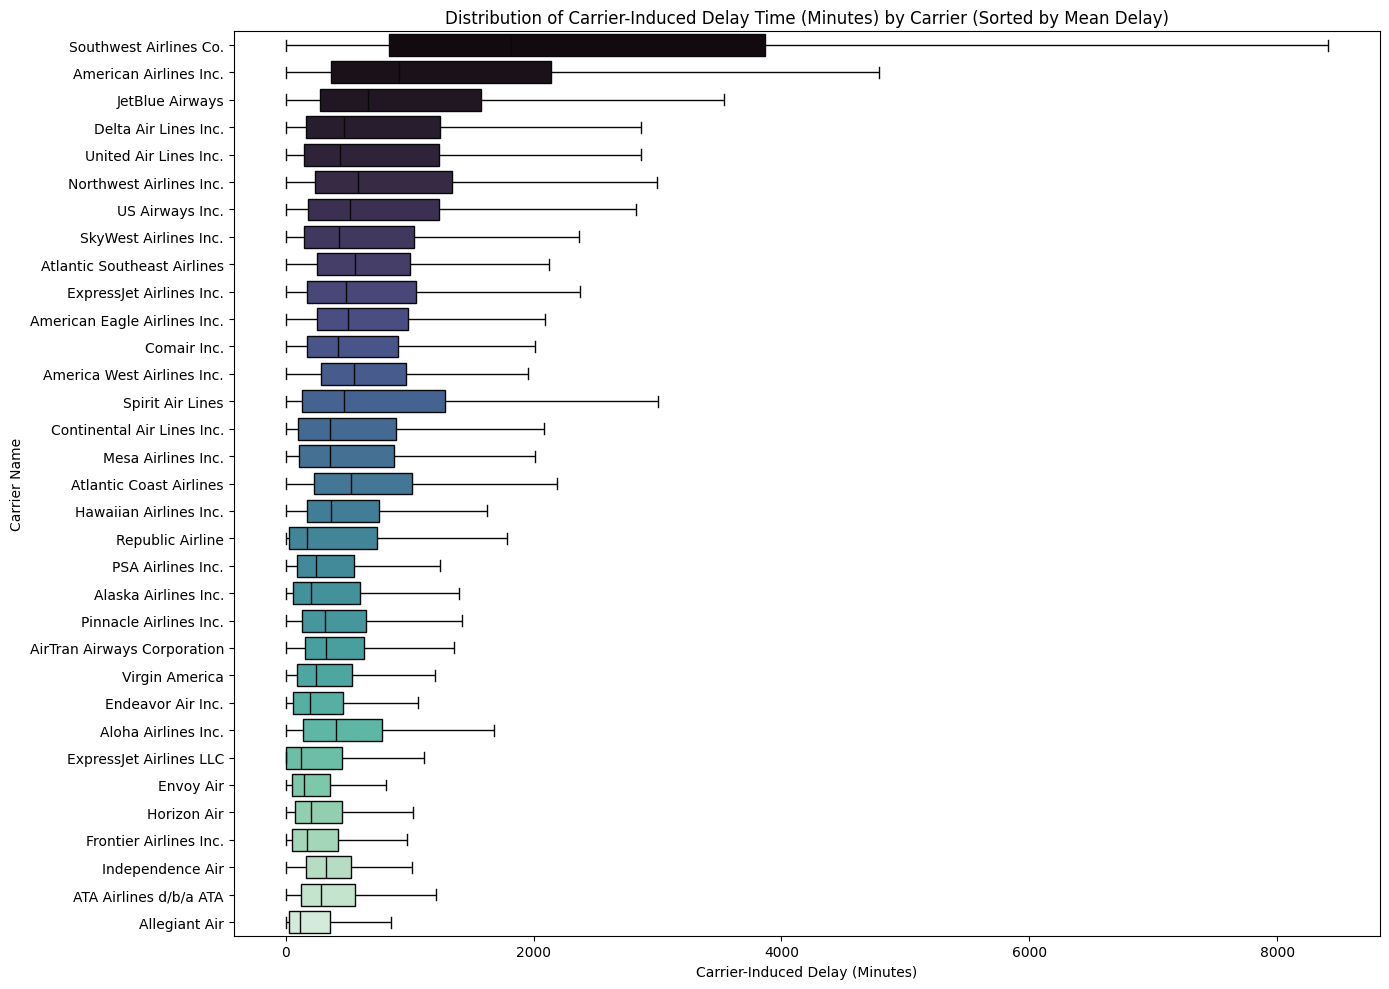

In [46]:
# Calculate the mean carrier_delay for each carrier
mean_carrier_delays = df_delay_cause.groupby('carrier_name')['carrier_delay'].mean().reset_index()

# Sort carriers by mean carrier_delay in descending order
mean_carrier_delays = mean_carrier_delays.sort_values(by='carrier_delay', ascending=False)

# Get the new order of carriers
carrier_order_by_mean_delay = mean_carrier_delays['carrier_name'].tolist()

plt.figure(figsize=(14, 10)) # Adjust figure size for better readability
sns.boxplot(x='carrier_delay', y='carrier_name', data=df_delay_cause,
            order=carrier_order_by_mean_delay, palette='mako', showfliers=False) # Using a different palette, and hiding extreme outliers

plt.title('Distribution of Carrier-Induced Delay Time (Minutes) by Carrier (Sorted by Mean Delay)')
plt.xlabel('Carrier-Induced Delay (Minutes)')
plt.ylabel('Carrier Name')
plt.tight_layout()
plt.show()

####Which Airline has the worst delays?

Because the dataset represent many various sizes of airlines, it is difficult to judge based on the number of delays. Instead, we will focus more on the length of delay as this is something airline could  achieve no matter the size of the company.

The top 10 worst Airlines are:
1. Southwest Airline Co.
2. American Airlines
3. Jet Blue Airways
4. Delta Airlines
5. United Airlines
6. Northwest Airlines
7. US Airways
8. Skywest Airlines
9. Atlantic Southeast Airline
10. ExpressJet Airline

Out of these 10, Southwest and American Airlines has the longest carrier induced delays of them all. therefore we want to look further into these 2 airlines to see if there are underlying trends or causes.


### 6.6 Monthly Delay Length Trend for Southwest Airlines Co. and American Airlines Inc.

To investigate the delay patterns over time for 'Southwest Airlines Co.' and 'American Airlines Inc.', we will create a time series plot showing their monthly arr_delay (total arrival delay minutes). This visualization will help determine if there's an increasing or decreasing trend in delay length for these two carriers.

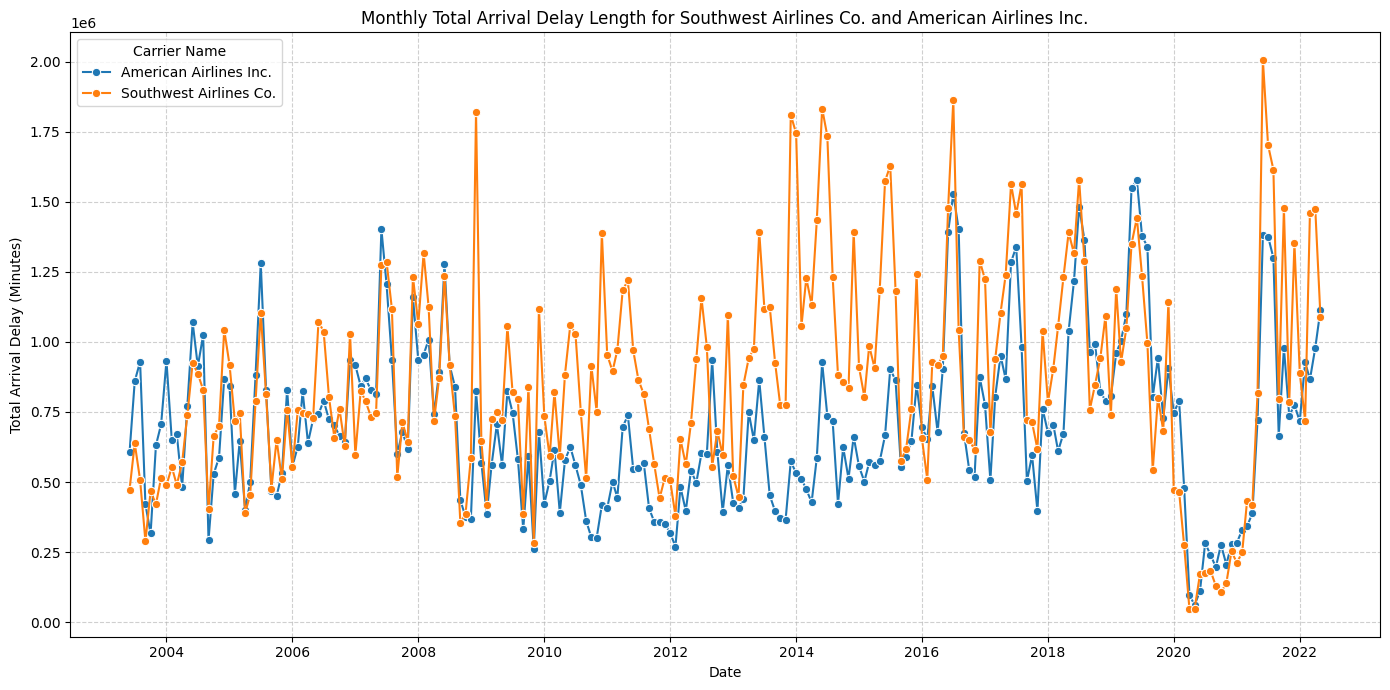

In [47]:
# Filter the DataFrame for the two specified carriers
target_carriers = ['Southwest Airlines Co.', 'American Airlines Inc.']
df_filtered = df_delay_cause[df_delay_cause['carrier_name'].isin(target_carriers)].copy()

# Group by 'date' (which represents month) and 'carrier_name', then sum 'arr_delay'
monthly_delay_trend = df_filtered.groupby(['date', 'carrier_name'])['arr_delay'].sum().reset_index()

# Create the time series plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='date', y='arr_delay', hue='carrier_name', data=monthly_delay_trend, marker='o')

plt.title('Monthly Total Arrival Delay Length for Southwest Airlines Co. and American Airlines Inc.')
plt.xlabel('Date')
plt.ylabel('Total Arrival Delay (Minutes)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Carrier Name')
plt.tight_layout()
plt.show()

###Time Series plot to see trend

Based on the time series plot of monthly total arrival delay length for Southwest Airlines Co. and American Airlines Inc., here are the key observations:

####Overall Upward Trend
Both Southwest Airlines Co. and American Airlines Inc. show a general increasing trend in their total monthly arrival delay minutes over the observed period (from 2003 to 2022). This suggests that across nearly two decades, the total duration of delays has grown for both major carriers.

Southwest Airlines Co. Generally Higher Delays: Throughout much of the time series, Southwest Airlines Co. consistently exhibits higher total monthly arrival delays compared to American Airlines Inc. This reinforces findings from previous analyses that Southwest handles a larger volume of delays.

####Clear Seasonality
Both airlines display strong seasonal patterns in their delays. There are recurring peaks, typically during the summer months (June, July, August) and sometimes around holiday seasons (December) indicating that travel surges and associated operational stresses contribute significantly to delays during these periods. Conversely, delays tend to be lower during off-peak seasons.

####Fluctuations and Variability
Beyond the general trend and seasonality, there's considerable month-to-month and year-to-year variability in delays for both airlines. These fluctuations could be attributed to various factors such as severe weather events, operational issues, air traffic control congestion, or other external circumstances.

####Covid effects
In years 2020 and 2021 the length of delay drop significantly due to the covid occurence where there is no flights at this time

### 6.7 Time Series Data Forecasting and Seasonality identification
Forecasting delay can be an interesting topic and has been widely studied in journals. Recent research has explored various advanced methodologies beyond traditional statistical models. One such approach utilizes deep learning through a modified stacked autoencoder architecture, which is specifically designed to learn generic features from flight on-time datasets and manage high-dimensional data (Bisandula et al., 2024). An interesting paper wrote on a comparative evaluation of six different machine learning classifiers to identify the effectiveness of these algorithms in predicting arrival delays—including Decision Tree, Random Forest, Support Vector Classifier (SVC), Logistic Regression, K-Nearest Neighbors (KNN), and Naive Bayes (AlBassam & AlShahrani, 2025). For this short assignment, we will only do a SARIMA forecasting in order to identify if there is a seasonal component and how it will look like 24 months into the future.


####6.7.1 Further clean the data to allow seasonality and forecasting analysis:
In order to do more detailed analysis we will choose to include only 'Southwest Airlines Co.' and 'American Airlines Inc.', refering to the 2 worst airline with delays & very long delay time.  In this data cleaning process we will also need to exclude data for the period identified as 'COVID months' (e.g., March 2020 to December 2021) as these periods have very low delays not due to improvement in the airline of airport system, but due to no flights occuring.


First, we will filter the df_delay_cause DataFrame to include only the specified carriers (Southwest Airlines Co. and American Airlines Inc.)



In [48]:
target_carriers = ['Southwest Airlines Co.', 'American Airlines Inc.']
df_filtered_carriers = df_delay_cause[df_delay_cause['carrier_name'].isin(target_carriers)].copy()

print(f"Shape of DataFrame after filtering by carriers: {df_filtered_carriers.shape}")

Shape of DataFrame after filtering by carriers: (37346, 22)


Now that the DataFrame is filtered by carriers, we will define the COVID-19 exclusion period and filter out the data within that period to create the final df_time_series DataFrame



In [49]:
covid_start_date = pd.to_datetime('2020-03-01')
covid_end_date = pd.to_datetime('2021-12-31')

# Filter out the COVID months
df_time_series = df_filtered_carriers[(df_filtered_carriers['date'] < covid_start_date) | (df_filtered_carriers['date'] > covid_end_date)].copy()

print(f"Shape of DataFrame after excluding COVID months: {df_time_series.shape}")
print(f"Date range of df_time_series: {df_time_series['date'].min()} to {df_time_series['date'].max()}")

Shape of DataFrame after excluding COVID months: (33070, 22)
Date range of df_time_series: 2003-06-01 00:00:00 to 2022-05-01 00:00:00


#### 6.7.2 Aggregate Monthly Delays for filtered Airlines

As the carrier_name occurs a few times in the dat (from different airports) we would need to aggregate the data into groups by airline name.


In [50]:
monthly_delays = df_time_series.groupby(['date', 'carrier_name'])['arr_delay'].sum().reset_index()

# Convert 'date' to datetime and set as index for time series analysis
monthly_delays['date'] = pd.to_datetime(monthly_delays['date'])
monthly_delays = monthly_delays.set_index('date')

print("Aggregated Monthly Delays (Head):")
display(monthly_delays.head())

print("\nDataFrame Information (Monthly Delays):")
monthly_delays.info()

Aggregated Monthly Delays (Head):


,carrier_name,arr_delay
date,,
2003-06-01,American Airlines Inc.,606404.0
2003-06-01,Southwest Airlines Co.,473210.0
2003-07-01,American Airlines Inc.,859774.0
2003-07-01,Southwest Airlines Co.,637900.0
2003-08-01,American Airlines Inc.,929164.0



DataFrame Information (Monthly Delays):
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 412 entries, 2003-06-01 to 2022-05-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carrier_name  412 non-null    object 
 1   arr_delay     412 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.7+ KB


### 6.7.3 Forecast Delays for Southwest Airlines (SARIMA)
Using the monthly aggregated delay data for Southwest Airlines Co., train a Seasonal ARIMA (SARIMA) model. For simplicity, we will start with a common set of parameters for the model, which can be tuned for better accuracy if required later. Then, generate future forecasts 24 months into the future (the dataset is only until 2022, therefore the forecast will be until 2024 only)


In [51]:
df_southwest = monthly_delays[monthly_delays['carrier_name'] == 'Southwest Airlines Co.'].copy()

print("Southwest Airlines Monthly Delays (Head):")
display(df_southwest.head())
print(f"Shape of Southwest Airlines data: {df_southwest.shape}")

Southwest Airlines Monthly Delays (Head):


,carrier_name,arr_delay
date,,
2003-06-01,Southwest Airlines Co.,473210.0
2003-07-01,Southwest Airlines Co.,637900.0
2003-08-01,Southwest Airlines Co.,507840.0
2003-09-01,Southwest Airlines Co.,288467.0
2003-10-01,Southwest Airlines Co.,467304.0


Shape of Southwest Airlines data: (206, 2)



Lets extract the 'arr_delay' column from the `df_southwest` DataFrame to create a time series specifically for Southwest Airlines' delays, this ensures simplicity in the code.

Will also check that the index time is datetime which is required for timeseries modeling.



In [52]:
southwest_ts = df_southwest['arr_delay']

print("Southwest Airlines 'arr_delay' time series (Head):")
display(southwest_ts.head())
print(f"Data type of time series index: {southwest_ts.index.dtype}")

Southwest Airlines 'arr_delay' time series (Head):


,arr_delay
date,
2003-06-01,473210.0
2003-07-01,637900.0
2003-08-01,507840.0
2003-09-01,288467.0
2003-10-01,467304.0


Data type of time series index: datetime64[ns]


Next we will import the SARIMAX class, instantiate and fit a SARIMA model with specified parameters to the Southwest Airlines time series data, and then generate future forecasts with confidence intervals.



In [53]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ensure the time series has a frequency specified
southwest_ts = southwest_ts.asfreq('MS')

# Define the SARIMA model parameters (p,d,q) and (P,D,Q,s)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12) # 12 for monthly seasonality

# Instantiate the SARIMAX model
sarimax_southwest_model = SARIMAX(southwest_ts, order=order, seasonal_order=seasonal_order)

# Fit the model
sarimax_southwest_results = sarimax_southwest_model.fit(disp=False)

print("SARIMAX Model for Southwest Airlines Fitted Successfully.")

# Generate future forecasts for 24 months
forecast_steps = 24
forecast_southwest = sarimax_southwest_results.get_forecast(steps=forecast_steps)

# Get predicted values and confidence intervals
forecast_mean_southwest = forecast_southwest.predicted_mean
forecast_ci_southwest = forecast_southwest.conf_int()

print(f"Generated forecasts for {forecast_steps} months.")
print("Forecast Mean (Head):")
display(forecast_mean_southwest.head())
print("Forecast Confidence Intervals (Head):")
display(forecast_ci_southwest.head())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


SARIMAX Model for Southwest Airlines Fitted Successfully.
Generated forecasts for 24 months.
Forecast Mean (Head):


,predicted_mean
2022-06-01,1.449186e+06
2022-07-01,1.507087e+06
2022-08-01,1.260385e+06
2022-09-01,7.918457e+05
2022-10-01,8.912425e+05


Forecast Confidence Intervals (Head):


,lower arr_delay,upper arr_delay
2022-06-01,890983.340803,2.007389e+06
2022-07-01,872504.842204,2.141669e+06
2022-08-01,593091.577334,1.927679e+06
2022-09-01,103387.216914,1.480304e+06
2022-10-01,186022.783778,1.596462e+06


Next lets repeat the same steps for American Airlines, starting by filtering the monthly_delays DataFrame to isolate its data.



In [54]:
df_american = monthly_delays[monthly_delays['carrier_name'] == 'American Airlines Inc.'].copy()

print("American Airlines Monthly Delays (Head):")
display(df_american.head())
print(f"Shape of American Airlines data: {df_american.shape}")

American Airlines Monthly Delays (Head):


,carrier_name,arr_delay
date,,
2003-06-01,American Airlines Inc.,606404.0
2003-07-01,American Airlines Inc.,859774.0
2003-08-01,American Airlines Inc.,929164.0
2003-09-01,American Airlines Inc.,420280.0
2003-10-01,American Airlines Inc.,316327.0


Shape of American Airlines data: (206, 2)


Next similar to the Southwest Airline method, we will save the arr_delay data into a timeseries.



In [55]:
american_ts = df_american['arr_delay']

# Ensure the time series has a frequency specified
american_ts = american_ts.asfreq('MS')

print("American Airlines 'arr_delay' time series (Head):")
display(american_ts.head())
print(f"Data type of time series index: {american_ts.index.dtype}")
print(f"Frequency of time series index: {american_ts.index.freq}")

American Airlines 'arr_delay' time series (Head):


,arr_delay
date,
2003-06-01,606404.0
2003-07-01,859774.0
2003-08-01,929164.0
2003-09-01,420280.0
2003-10-01,316327.0


Data type of time series index: datetime64[ns]
Frequency of time series index: <MonthBegin>


Next we will import the SARIMAX class, instantiate and fit a SARIMA model with specified parameters to the American Airlines time series data, and then generate 24 month future forecasts with confidence intervals.



In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the SARIMA model parameters (p,d,q) and (P,D,Q,s)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12) # 12 for monthly seasonality

# Instantiate the SARIMAX model
sarimax_american_model = SARIMAX(american_ts, order=order, seasonal_order=seasonal_order)

# Fit the model
sarimax_american_results = sarimax_american_model.fit(disp=False)

print("SARIMAX Model for American Airlines Fitted Successfully.")

# Generate future forecasts for 24 months
forecast_steps = 24
forecast_american = sarimax_american_results.get_forecast(steps=forecast_steps)

# Get predicted values and confidence intervals
forecast_mean_american = forecast_american.predicted_mean
forecast_ci_american = forecast_american.conf_int()

print(f"Generated forecasts for {forecast_steps} months.")
print("Forecast Mean (Head):")
display(forecast_mean_american.head())
print("Forecast Confidence Intervals (Head):")
display(forecast_ci_american.head())

SARIMAX Model for American Airlines Fitted Successfully.
Generated forecasts for 24 months.
Forecast Mean (Head):


,predicted_mean
2022-06-01,1.316618e+06
2022-07-01,1.323462e+06
2022-08-01,1.210768e+06
2022-09-01,8.329100e+05
2022-10-01,8.651938e+05


Forecast Confidence Intervals (Head):


,lower arr_delay,upper arr_delay
2022-06-01,886461.058479,1.746774e+06
2022-07-01,818418.496837,1.828506e+06
2022-08-01,669373.927664,1.752162e+06
2022-09-01,267068.560676,1.398752e+06
2022-10-01,280077.935360,1.450310e+06


### 6.7.4 Plotting Southwest Airline time series

Next we will plot Southwest Airline time series with the forecasting for 24 months ahead included



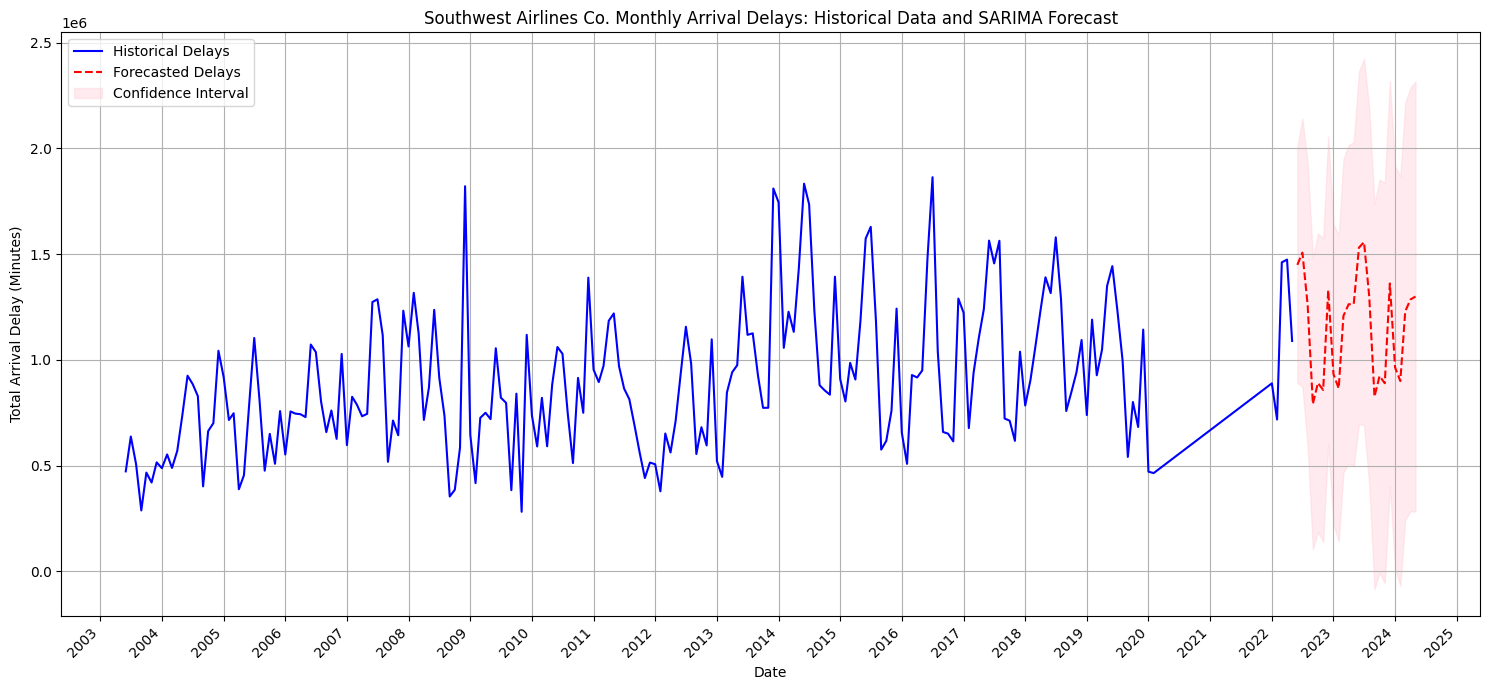

In [57]:
import matplotlib.dates as mdates
from matplotlib.ticker import NullFormatter

# Create a figure and axes for the plot
plt.figure(figsize=(15, 7))

# Plot historical data for Southwest Airlines
sns.lineplot(x=southwest_ts.index, y=southwest_ts.values, label='Historical Delays', color='blue')

# Plot forecasted mean for Southwest Airlines
sns.lineplot(x=forecast_mean_southwest.index, y=forecast_mean_southwest.values, label='Forecasted Delays', color='red', linestyle='--')

# Plot confidence intervals for Southwest Airlines forecasts
plt.fill_between(forecast_ci_southwest.index,
                 forecast_ci_southwest.iloc[:, 0],
                 forecast_ci_southwest.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('Southwest Airlines Co. Monthly Arrival Delays: Historical Data and SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Total Arrival Delay (Minutes)')
plt.legend()
plt.grid(True)

# Set major ticks for years only, and remove minor ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator()) # Major ticks for every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Format as year
ax.minorticks_off() # Directly turn off minor ticks
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # Rotate year labels for readability

plt.tight_layout()
plt.show()

### 6.7.5 Plotting American Airline Time Series
Next we will plot American Airline time series with the forecasting for 24 months ahead included



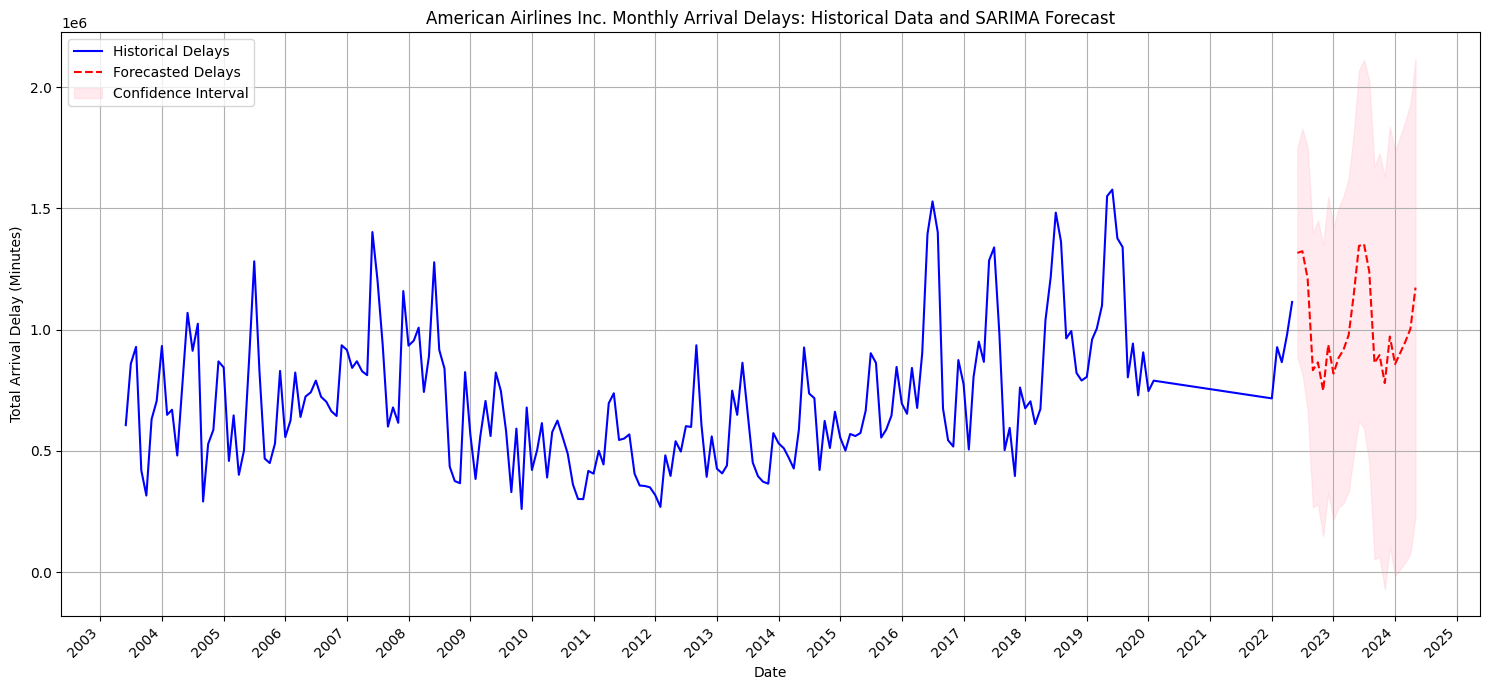

In [58]:
# Create a figure and axes for the plot
plt.figure(figsize=(15, 7))

# Plot historical data for American Airlines
sns.lineplot(x=american_ts.index, y=american_ts.values, label='Historical Delays', color='blue')

# Plot forecasted mean for American Airlines
sns.lineplot(x=forecast_mean_american.index, y=forecast_mean_american.values, label='Forecasted Delays', color='red', linestyle='--')

# Plot confidence intervals for American Airlines forecasts
plt.fill_between(forecast_ci_american.index,
                 forecast_ci_american.iloc[:, 0],
                 forecast_ci_american.iloc[:, 1], color='pink', alpha=0.3, label='Confidence Interval')

plt.title('American Airlines Inc. Monthly Arrival Delays: Historical Data and SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Total Arrival Delay (Minutes)')
plt.legend()
plt.grid(True)

# Set major ticks for years only, and remove minor ticks
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator()) # Major ticks for every year
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Format as year
ax.minorticks_off() # Directly turn off minor ticks
plt.setp(ax.get_xticklabels(), rotation=45, ha='right') # Rotate year labels for readability

plt.tight_layout()
plt.show()

### 6.7.6 Summary of SARIMA Forecasts for Southwest Airlines and American Airlines

Based on the SARIMA models trained on the monthly arrival delay data (excluding the COVID-19 period from March 2020 to December 2021) for Southwest Airlines and American Airlines, the following trends and predictions are observed:

### General Trends:
1.  **Seasonal Pattern Consistency**: Both airlines exhibit strong and consistent seasonal patterns in their forecasted delays, mirroring the historical data. Delays are predicted to peak during warmer months (e.g., summer) and potentially around holiday seasons, and decrease during off-peak periods.
2.  **Upward Trend in Delays**: The forecasts for both airlines suggest a continuation of the upward trend in total monthly arrival delays, similar to the historical patterns observed before the COVID-19 pandemic. This implies that without significant operational changes, the total delay minutes are projected to increase over the next 24 months.

### Specific Observations:
*   **Southwest Airlines**: The SARIMA model predicts that Southwest will continue to experience higher total monthly arrival delays compared to American Airlines. The peaks in forecasted delays are notably higher, reflecting Southwest's historical tendency for larger overall delay volumes.

*   **American Airlines**: While also showing an increasing trend and strong seasonality, American Airlines' forecasted delay volumes are generally lower than those of Southwest Airlines Co. The model captures similar seasonal fluctuations but at a lower overall magnitude.

### Key Predictions:
*   The models predict that seasonal peaks, often associated with high travel demand and potential weather disruptions, will remain significant contributors to overall delays for both carriers.
*   The overall trend suggests that managing and mitigating increasing delay minutes will be a challenge for both airlines in the foreseeable future.
*   SARIMA gives an understanding of the pattern and reasons behind the delays. Since there is a seasonal trend, this means the aircraft delay is very driven by operational inability to cope with the increasing demand during summer and holiday periods.



#7.0 Airport Contribution to delays

##7.1 Barplot (Airports with the highest frequency of delay)
Next we would like to plot a barplot to check which airport has the highest delays regardless of airline. this info will tell us if airport mishandling could also be a contributor to delay. Since there is a lot of airports we will focus on the top 15 airports for this quick analysis

Top 15 Airports by Total Delays:


,airport_name,arr_del15
19,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",1332668.0
67,"Chicago, IL: Chicago O'Hare International",1276665.0
89,"Dallas/Fort Worth, TX: Dallas/Fort Worth Inter...",923210.0
222,"Los Angeles, CA: Los Angeles International",765651.0
95,"Denver, CO: Denver International",749160.0
337,"San Francisco, CA: San Francisco International",677788.0
267,"Newark, NJ: Newark Liberty International",670034.0
167,"Houston, TX: George Bush Intercontinental/Houston",574012.0
210,"Las Vegas, NV: McCarran International",545101.0
297,"Phoenix, AZ: Phoenix Sky Harbor International",536098.0


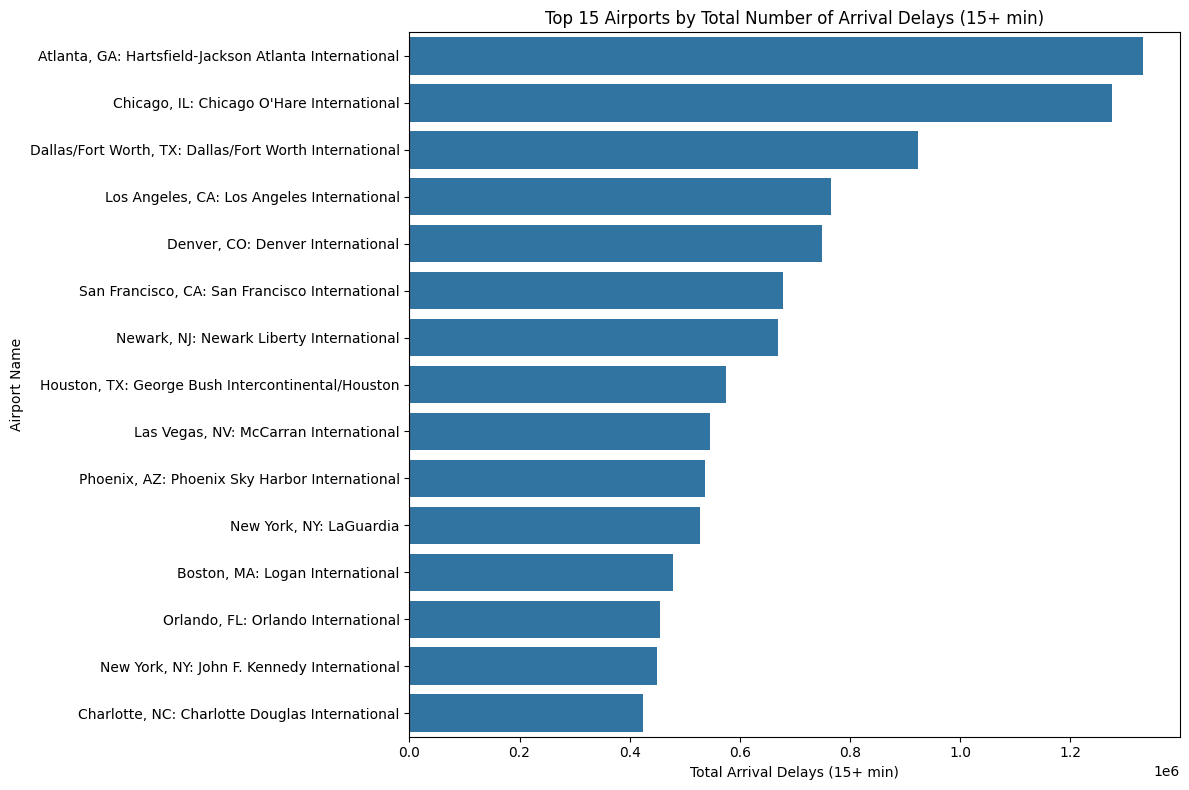

In [59]:
# Group by airport_name and sum the 'arr_del15' (total delays)
total_delays_by_airport = df_delay_cause.groupby('airport_name')['arr_del15'].sum().reset_index()

# Sort the results for better visualization, showing top 15 airports
total_delays_by_airport = total_delays_by_airport.sort_values(by='arr_del15', ascending=False).head(15)

print("Top 15 Airports by Total Delays:")
display(total_delays_by_airport)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='arr_del15', y='airport_name', data=total_delays_by_airport)
plt.title('Top 15 Airports by Total Number of Arrival Delays (15+ min)')
plt.xlabel('Total Arrival Delays (15+ min)')
plt.ylabel('Airport Name')
plt.tight_layout()
plt.show()

It was found that Atlanta has the most number of delays and should be one of the airport that we could study further to understand the underlying causes of delay due to airport managment.

## 7.2 Boxplot of Delay Length by Airport

To examine the duration of delays at different airports, we will create a boxplot showing the distribution of `arr_delay` (total arrival delay minutes) for each `airport_name`. The airports will be sorted by their mean delay length in order for us to choose which airport has the highest delay length

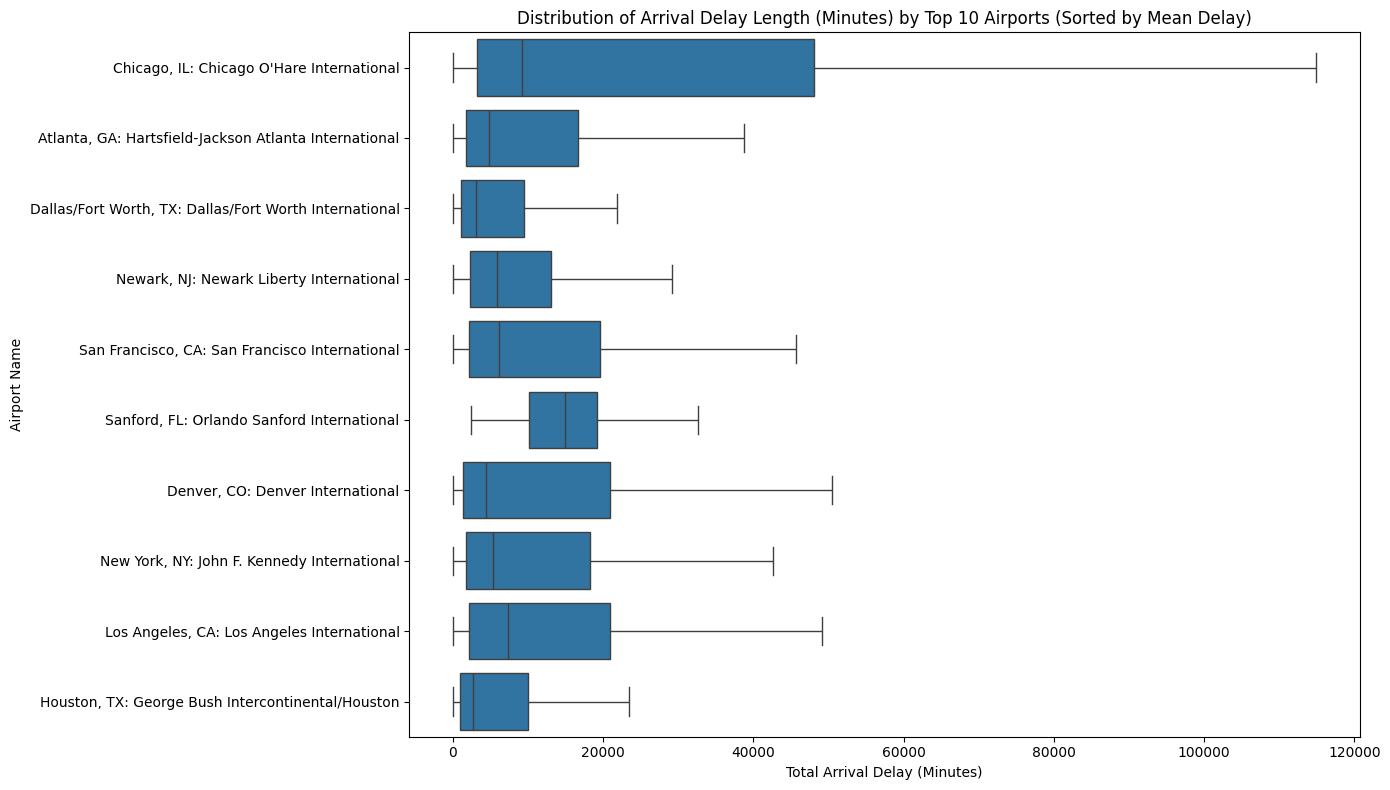

In [60]:
# Calculate the mean arr_delay for each airport
mean_delays_by_airport = df_delay_cause.groupby('airport_name')['arr_delay'].mean().reset_index()

# Sort airports by mean arr_delay in descending order
mean_delays_by_airport = mean_delays_by_airport.sort_values(by='arr_delay', ascending=False)

# Get the new order of airports (top 10)
airport_order_by_mean_delay = mean_delays_by_airport['airport_name'].head(10).tolist()

# Filter df_delay_cause to include only the top 10 airports for plotting
df_top_10_airports = df_delay_cause[df_delay_cause['airport_name'].isin(airport_order_by_mean_delay)]

plt.figure(figsize=(14, 8)) # Adjust figure size for better readability
sns.boxplot(x='arr_delay', y='airport_name', data=df_top_10_airports,
            order=airport_order_by_mean_delay, showfliers=False) # Hiding extreme outliers

plt.title('Distribution of Arrival Delay Length (Minutes) by Top 10 Airports (Sorted by Mean Delay)')
plt.xlabel('Total Arrival Delay (Minutes)')
plt.ylabel('Airport Name')
plt.tight_layout()
plt.show()

## 7.3 Airport with the worst delays

From the barplot and boxplot it was found that Chicago and Atlanta are the worst 2 airports that have the most delays. Chicago is worst in terms of longest delay length while Atlanta has the most number of delays above 15mins.



#8.0 Conclusion
In conclusion, through the use of pie charts through python, it was found that the root causes of flight delay are mainly attributed to three issues namely, late aircraft arrival, air traffic control issues and due to Carrier management itself. It must be noted that flight delays in Malaysia are a multi-faceted issue and the root causes that are available in the Airline_delay_cause dataset may need to be extended by adding more data especially from local airlines so that more detailed data analysis and predictions could be done.

Through the plotting of barplot and boxplot, it was found that some airlines namely Southwest Airline and American Airline ranked as the top two airlines with either the highest number of delays or the longest time of delay.

Furthermore, it was also found through the time series plotting and SARIMA forecasting that the flight delays are seasonal and peak during summer and holiday seasons. This highlights that the airport or airline are highly affected by the increase in demand during this timeframe.

#9.0 Recommendations
To improve operational efficiency, there is already many research focused on improving the effectivenes of airline scheduling and management. It is recommended that airlines implement a more robust scheduling system that incorporates parameters such as the day of the week, the month, and the specific departure time, as these factors significantly influence the likelihood of delays (Romli et al., 2012). Airlines should also utilize advanced machine learning techniques, such as decision forests and random forests, to predict potential cancellations and arrival delays well in advance (Faiza & Khalil, 2024). Management should pay particular attention to larger capacity aircraft, which have been found to be more susceptible to longer delays, and implement strategies to prevent these delays from propagating throughout the rest of the daily schedule (Zámková et al., 2022). Additionally, airlines can optimize ground operations by establishing fixed scheduled times for the completion of ground processes and prioritizing "emergent" flights (Zámková et al., 2022). Taking these proactive steps will not only improve service quality but will also result in significant fuel savings and a reduced environmental impact for the airline (Zámková et al., 2022).

  However from the findings of this study, what the plots were
able to visualize were that there are airlines that experience longer and more frequent delays which means airline management play an important role in reducing the delays. Through the SARIMA analysis, it was also found the delays in airlines such as American Airline was very seasonal, which means airports or airlines could not cope with the higher demand in the summer and holiday months. It is suggested that airlines plan holiday seasons with more support staff and try to use tools such as online pre-checkin to help solve the high demand issue.

#10.0 Reference
AlBassam, S. A. A., & AlShahrani, D. N. (2025). Flight delay prediction: Evaluating machine learning algorithms for enhanced accuracy. PLoS ONE, 20(12), e0335141.

Bisandula, D. B., Soviani-Sitoiu, D. A., & Moulitsas, I. (2024). An Enhanced Deep Autoencoder for Flight Delay Prediction. Journal of Aviation/Aerospace Education & Research (JAAER).

Faiza, & Khalil, K. (2024). Predicting Monthly Flight Cancellations in the Post-Pandemic Times Using Machine Learning Methods. International Journal of Industrial Engineering, 31(6), 1392-1405.

Rapajic, J. (2009). Beyond Airline Disruptions. Ashgate Publishing. P. 16. ISBN 9780754674405.

Romli, F. I., Tan, K. J., Teong, C. K., Ong, T. C., & Koo, T. H. (2012). Factorial study on airport delay for flight scheduling process. Electronic Resource.

Zámková, M., Rojík, S., Prokop, M., & Stolín, R. (2022). Factors Affecting the International Flight Delays and Their Impact on Airline Operation and Management and Passenger Compensations Fees in Air Transport Industry: Case Study of a Selected Airlines in Europe. Sustainability, 14(22), 14763.